# Lista 4 Problema 2 Individual - Esa música me hace sentir ...

In [1]:
!pip install --user --upgrade apafib

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from apafib import load_musica

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.inspection import permutation_importance

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier

# Apartado A

Para este apartado se realiza una partición del conjunto de datos en entrenamiento y test, teniendo en cuenta que el conjunto de datos solo
tiene variables continuas y no hay valores perdidos. Además se hace una reducción de dimensionalidad mediante PCA y t-SNE y se representa la variable respuesta sobre la transformación.

In [8]:
data = load_musica()
data.head()


,Class,_RMSenergy_Mean,_Lowenergy_Mean,_Fluctuation_Mean,_Tempo_Mean,_MFCC_Mean_1,_MFCC_Mean_2,_MFCC_Mean_3,_MFCC_Mean_4,_MFCC_Mean_5,...,_Chromagram_Mean_9,_Chromagram_Mean_10,_Chromagram_Mean_11,_Chromagram_Mean_12,_HarmonicChangeDetectionFunction_Mean,_HarmonicChangeDetectionFunction_Std,_HarmonicChangeDetectionFunction_Slope,_HarmonicChangeDetectionFunction_PeriodFreq,_HarmonicChangeDetectionFunction_PeriodAmp,_HarmonicChangeDetectionFunction_PeriodEntropy
0,relax,0.052,0.591,9.136,130.043,3.997,0.363,0.887,0.078,0.221,...,0.426,1.000,0.008,0.101,0.316,0.261,0.018,1.035,0.593,0.970
1,relax,0.125,0.439,6.680,142.240,4.058,0.516,0.785,0.397,0.556,...,0.002,1.000,0.000,0.984,0.285,0.211,-0.082,3.364,0.702,0.967
2,relax,0.046,0.639,10.578,188.154,2.775,0.903,0.502,0.329,0.287,...,0.184,0.746,0.016,1.000,0.413,0.299,0.134,1.682,0.692,0.963
3,relax,0.135,0.603,10.442,65.991,2.841,1.552,0.612,0.351,0.011,...,0.038,1.000,0.161,0.757,0.422,0.265,0.042,0.354,0.743,0.968
4,relax,0.066,0.591,9.769,88.890,3.217,0.228,0.814,0.096,0.434,...,0.004,0.404,1.000,0.001,0.345,0.261,0.089,0.748,0.674,0.957


In [9]:
print(data.columns)

Index(['Class', '_RMSenergy_Mean', '_Lowenergy_Mean', '_Fluctuation_Mean',
       '_Tempo_Mean', '_MFCC_Mean_1', '_MFCC_Mean_2', '_MFCC_Mean_3',
       '_MFCC_Mean_4', '_MFCC_Mean_5', '_MFCC_Mean_6', '_MFCC_Mean_7',
       '_MFCC_Mean_8', '_MFCC_Mean_9', '_MFCC_Mean_10', '_MFCC_Mean_11',
       '_MFCC_Mean_12', '_MFCC_Mean_13', '_Roughness_Mean', '_Roughness_Slope',
       '_Zero-crossingrate_Mean', '_AttackTime_Mean', '_AttackTime_Slope',
       '_Rolloff_Mean', '_Eventdensity_Mean', '_Pulseclarity_Mean',
       '_Brightness_Mean', '_Spectralcentroid_Mean', '_Spectralspread_Mean',
       '_Spectralskewness_Mean', '_Spectralkurtosis_Mean',
       '_Spectralflatness_Mean', '_EntropyofSpectrum_Mean',
       '_Chromagram_Mean_1', '_Chromagram_Mean_2', '_Chromagram_Mean_3',
       '_Chromagram_Mean_4', '_Chromagram_Mean_5', '_Chromagram_Mean_6',
       '_Chromagram_Mean_7', '_Chromagram_Mean_8', '_Chromagram_Mean_9',
       '_Chromagram_Mean_10', '_Chromagram_Mean_11', '_Chromagram_Mean_12

Primero separamos la variable objetivo de los atributos y particionamos los datos en conjuntos de entrenamiento y test. Se utiliza stratify para mantener la proporción de cada clase.

In [10]:
target_col = 'Class'
X = data.drop(columns=[target_col])
y = data[target_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

Para poder hacer PCA correctamente debemos escalar antes el conjunto de datos. 

In [13]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

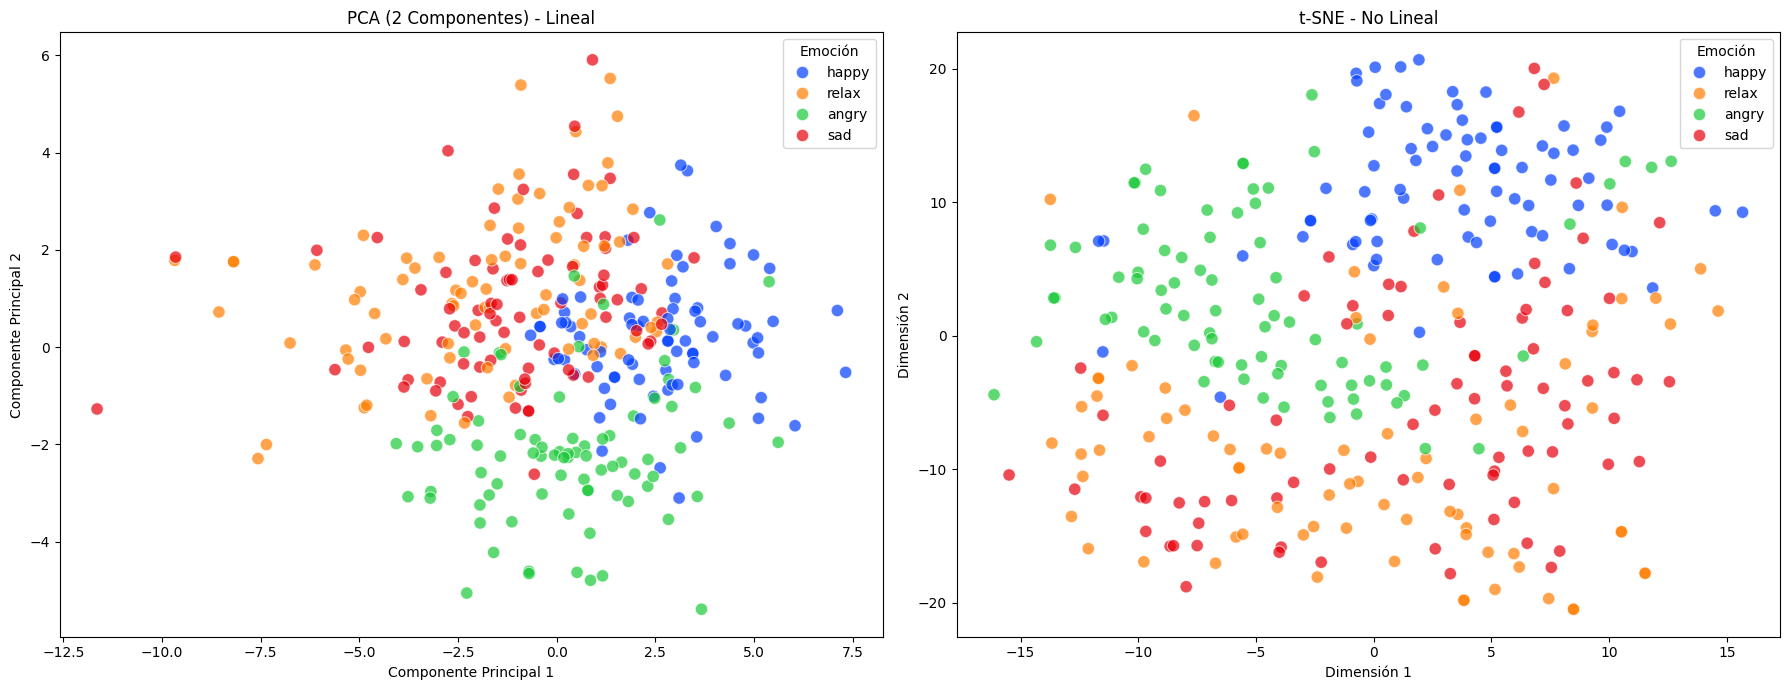

Varianza explicada por los 2 primeros componentes del PCA: 24.73%


In [14]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_scaled)

tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_train_scaled)

fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Gráfica PCA
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y_train, palette='bright', alpha=0.7, s=80, ax=axes[0])
axes[0].set_title('PCA (2 Componentes) - Lineal')
axes[0].set_xlabel('Componente Principal 1')
axes[0].set_ylabel('Componente Principal 2')
axes[0].legend(title='Emoción')

# Gráfica t-SNE
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=y_train, palette='bright', alpha=0.7, s=80, ax=axes[1])
axes[1].set_title('t-SNE - No Lineal')
axes[1].set_xlabel('Dimensión 1')
axes[1].set_ylabel('Dimensión 2')
axes[1].legend(title='Emoción')

plt.tight_layout()
plt.show()

print(f"Varianza explicada por los 2 primeros componentes del PCA: {pca.explained_variance_ratio_.sum()*100:.2f}%")

El análisis visual, especialmente mediante t-SNE, revela una clara estructura de agrupamiento por clases, confirmando que las variables predictoras contienen información relevante sobre la emoción. Sin embargo, la proyección PCA muestra una superposición significativa y una baja varianza explicada (24.73%), lo que sugiere que las clases no son linealmente separables. 

Viendo estos resultados podemos responder a las preguntas del enunciado. 

**¿Parece haber alguna relación entre las variables con la variable respuesta?**

Sí, observando el gráfico t-SNE se puede apreciar que los puntos se agrupan por colores lo que nos indica que las características físicas del sonido (frecuencia, tempo, energía) contienen la información necesaria para distinguir las emociones.

**¿Podrían ser las clases linealmente separables?**


Viendo el gráfico de PCA se observa un solapamiento considerable entre las distintas clases en la zona central, lo que impide trazar fronteras de decisión rectas (lineales) que las separen sin cometer un alto número de errores. Esto sugiere que será necesario utilizar modelos capaces de capturar fronteras de decisión no lineales para obtener un buen rendimiento.

# Apartado B

Para este apartado se va a ajustar una regresión logística y una SVM lineal. Además se va a evaluar la calidad de los modelos.

Empezamos primero entrenando el modelo con regresión logística, para ello se prueban los diferentes valores entre 0.0001 y 1000 distribuidos uniformemente en escala logarítmica. Esta estrategia nos permite explorar distintos órdenes de magnitud para el hiperparámetro C, evaluando desde una regularización muy fuerte hasta una muy débil, para encontrar el punto de equilibrio óptimo mediante validación cruzada.

In [18]:
param_grid = {'C': np.logspace(-4, 3, 20)}
lr = LogisticRegression(max_iter=5000, random_state=42)

grid_lr = GridSearchCV(lr, param_grid, cv=5, scoring='accuracy', n_jobs=-1, return_train_score=True)
grid_lr.fit(X_train_scaled, y_train)


best_C = grid_lr.best_params_['C']
print(f"\nEl valor óptimo de C es: {best_C:.5f}")
print(f"Accuracy media en validación (Train): {grid_lr.best_score_:.4f}")


El valor óptimo de C es: 0.08859
Accuracy media en validación (Train): 0.8219


A continuación se visualiza y se evalua la regresión logística.


Resultados en el conjunto de TEST (Regresión Logística):
              precision    recall  f1-score   support

       angry       0.89      0.80      0.84        20
       happy       0.90      0.95      0.93        20
       relax       0.62      0.80      0.70        20
         sad       0.47      0.35      0.40        20

    accuracy                           0.72        80
   macro avg       0.72      0.72      0.72        80
weighted avg       0.72      0.72      0.72        80



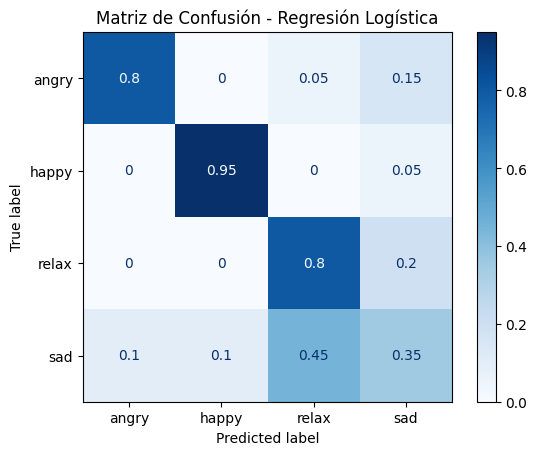

In [30]:
print("\nResultados en el conjunto de TEST (Regresión Logística):")
y_pred_lr = grid_lr.predict(X_test_scaled)
print(classification_report(y_test, y_pred_lr))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_lr, cmap='Blues', normalize='true')
plt.title('Matriz de Confusión - Regresión Logística')
plt.show()

En la búsqueda de hiperparámetros, hemos encontrado que el valor óptimo de C es 0.08859 lo que implica una regularización fuerte. El modelo penaliza los coeficientes para evitar overfitting, esto es coherente con lo que se ha visto en PCA, como las nubes de puntos de cada emoción se solapan en el centro, es prefierible trazar una frontera de decisión simple y conservadora en lugar de intentar ajustarse a cada punto ruidoso del entrenamiento.

Esta configuración nos proporciona una Accuracy media del 82.19% en validación, estableciendo un nivel base sólido. Si observamos la matriz de confusión, el modelo distingue muy bien las emociones energéticas ('Happy', 'Angry'), pero tiende a confundir las emociones más pasivas ('Sad' con 'Relax'), lo cual es lógico ya que comparten características acústicas similares (baja energía, tempo lento).

Seguimos con lo que pide el enunciado, a continuación se realiza un entrenamiento con SVM lineal en concreto, utilizaremos la implementación LinearSVC. Al igual que hicimos con la regresión logística, emplearemos una búsqueda de hiperparámetros (GridSearchCV) para encontrar el valor óptimo de regularización (C) que maximice la precisión del modelo.


In [25]:
svm_lin = LinearSVC(dual=False, max_iter=5000, random_state=42)
param_grid_svm = {'C': np.logspace(-4, 3, 20)} 

# GridSearch
grid_svm = GridSearchCV(svm_lin, param_grid_svm, cv=5, scoring='accuracy', n_jobs=-1, return_train_score=True)
grid_svm.fit(X_train_scaled, y_train)

best_C_svm = grid_svm.best_params_['C']
print(f"Mejor C para SVM Lineal: {best_C_svm:.5f}")
print(f"Accuracy media en validación: {grid_svm.best_score_:.4f}")



Mejor C para SVM Lineal: 0.20691
Accuracy media en validación: 0.8125


Al igual que en la Regresión Logística, obtenemos un valor de C bajo. En el contexto de las SVM, esto implica un margen más amplio. El modelo prefiere permitir algunos errores de clasificación dentro del margen a cambio de tener una frontera de decisión más estable y generalizable, evitando así ajustarse demasiado al ruido de las zonas donde las emociones se solapan.

Además obtenemos una Accuracy menor a la obtenida en la regresión logística, (menos de un 1% de diferencia). Esto nos sugiere el límite teórico de la separabilidad lineal y la necesidad de introducir no-linealidad. 


Resultados en el conjunto de TEST (SVM Lineal):
              precision    recall  f1-score   support

       angry       0.86      0.90      0.88        20
       happy       0.83      1.00      0.91        20
       relax       0.62      0.75      0.68        20
         sad       0.64      0.35      0.45        20

    accuracy                           0.75        80
   macro avg       0.74      0.75      0.73        80
weighted avg       0.74      0.75      0.73        80



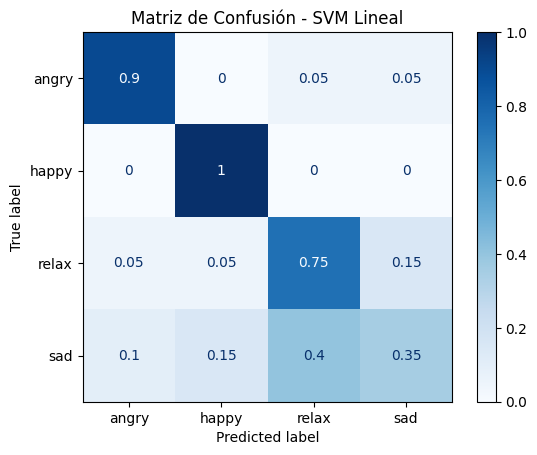

In [32]:
print("\nResultados en el conjunto de TEST (SVM Lineal):")
y_pred_svm = grid_svm.predict(X_test_scaled)
print(classification_report(y_test, y_pred_svm))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_svm, cmap='Blues', normalize='true')
plt.title('Matriz de Confusión - SVM Lineal')
plt.show()

La SVM Lineal traza una recta para separar las clases. Sin embargo, la frontera entre "sad" y "relax" es difusa y probablemente curva. Al intentar separarlas con una recta, el modelo se ve obligado a cometer errores en ambos lados. Esto confirma visualmente la limitación de la linealidad que habíamos mencionado con el PCA.

# Apartado C

Para este apartado entrenar modelos SVM con kernel RBF ajustando adecuadamente sus hiperparámetros. También se calculará la permutation importance sobre el test para determinar qué atributos son más
importantes en el modelo para predecir. 

Primero empezamos entrenando los modelos SVM con kernel RBF. Para ello incluimos la búsqueda del parámetro gamma que indica el radio de influencia. Finalmente, seleccionamos el modelo con la mejor combinación de parámetros y evaluamos su capacidad de generalización real sobre el conjunto de test reservado.

In [42]:
param_grid_rbf = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'gamma': ['scale', 0.1, 0.01, 0.001]
}

svm_rbf = SVC(kernel='rbf', random_state=42)

grid_rbf = GridSearchCV(svm_rbf, param_grid_rbf, cv=5, scoring='accuracy', n_jobs=-1)
grid_rbf.fit(X_train_scaled, y_train)


print(f"Mejores parámetros RBF: {grid_rbf.best_params_}")
print(f"Accuracy RBF (Validación): {grid_rbf.best_score_:.4f}")

acc_test_rbf = grid_rbf.score(X_test_scaled, y_test)
print(f"Accuracy RBF (Test): {acc_test_rbf:.4f}")

Mejores parámetros RBF: {'C': 1, 'gamma': 0.01}
Accuracy RBF (Validación): 0.8094
Accuracy RBF (Test): 0.7250


Podemos observar que le valor C es intermedio que no impone una regularización fuerte pero tampoco deja al modelo ajustarse libremente. 
También se ve que el valor gamma es bajo, lo que indica que el radio de influencia de cada muestra es amplio. Esto genera fronteras de decisión más suaves y menos fragmentadas.

Vemos que el Accuracy es ligeramente inferior al obtenido anteriormente con los modelos lineales, lo que contradice nuestra hipotesis de que la no-linealidad mejoraria la clasificación. Vemos también que el accuracy con Test tiene una caída drástica lo que es un signo claro de overfitting. Estos resultados no son los esperados, a continuación vamos a hacer un análisis de importancia de atributos para intentar diagnosticar la causa de este bajo rendimiento. Para ello  se utilizará la técnica de Permutation Importance. El objetivo es comparar qué atributos considera importantes el modelo RBF frente a los que priorizaba el modelo lineal (Regresión Logística).

In [44]:
rbf_importance = permutation_importance(grid_rbf.best_estimator_, X_test_scaled, y_test, 
                                        n_repeats=10, random_state=42, n_jobs=-1)


feature_names = X.columns
importancia_rbf = pd.DataFrame({
    'feature': feature_names,
    'importance_mean': rbf_importance.importances_mean,
    'importance_std': rbf_importance.importances_std
}).sort_values(by='importance_mean', ascending=False)

coefs_lr = np.mean(np.abs(grid_lr.best_estimator_.coef_), axis=0)

importancia_lr = pd.DataFrame({
    'feature': feature_names,
    'importance_lr': coefs_lr
}).sort_values(by='importance_lr', ascending=False)

top_n = 10
top_features_rbf = importancia_rbf.head(top_n)['feature'].values

df_comparacion = pd.DataFrame({
    'feature': top_features_rbf,
    'RBF Permutation': importancia_rbf.set_index('feature').loc[top_features_rbf]['importance_mean'],
    'Linear Coef (RegLog)': importancia_lr.set_index('feature').loc[top_features_rbf]['importance_lr']
})

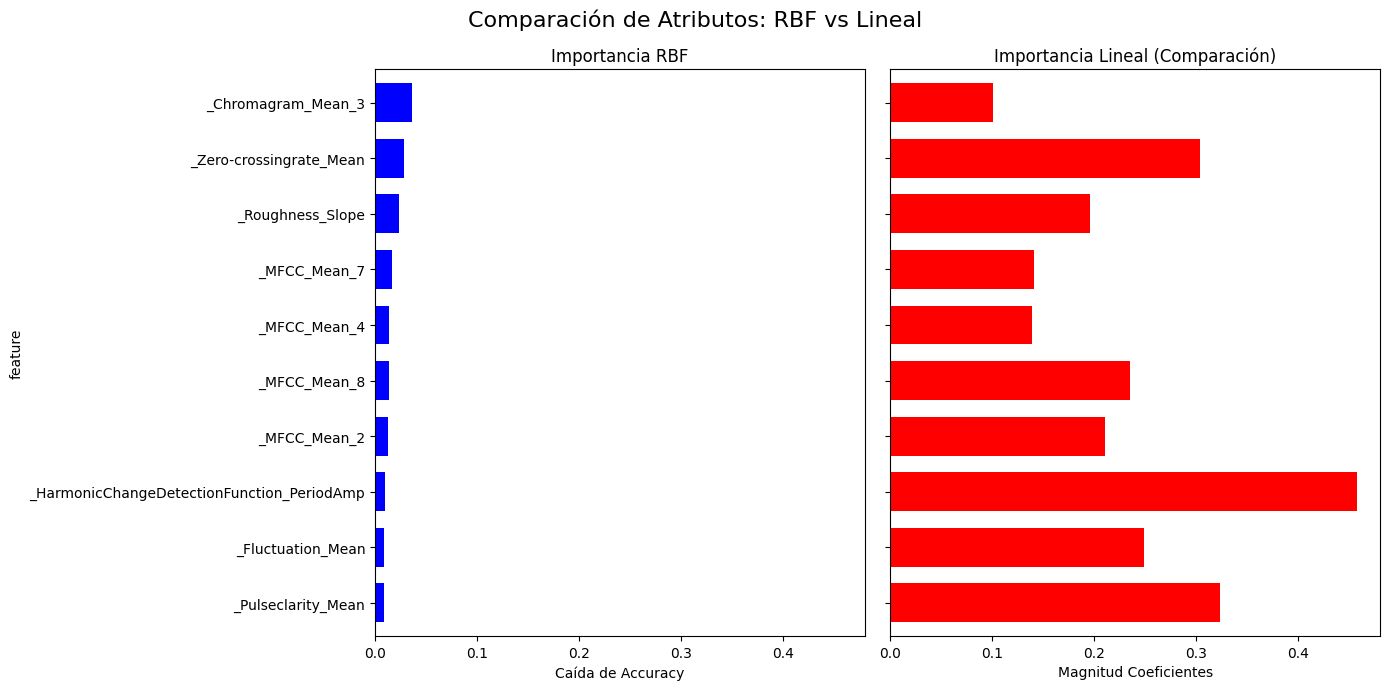

Top 5 Variables para SVM RBF:
feature
_Chromagram_Mean_3         0.03625
_Zero-crossingrate_Mean    0.02875
_Roughness_Slope           0.02375
_MFCC_Mean_7               0.01625
_MFCC_Mean_8               0.01375
Name: RBF Permutation, dtype: float64


In [53]:

df_pandas = df_comparacion.set_index('feature').sort_values(by='RBF Permutation', ascending=True)

axes = df_pandas.plot.barh(subplots=True, layout=(1, 2), figsize=(14, 7), 
                           color=['blue', 'red'], legend=False, sharey=True, width=0.7)

axes[0][0].set_title('Importancia RBF')
axes[0][0].set_xlabel('Caída de Accuracy')

axes[0][1].set_title('Importancia Lineal (Comparación)')
axes[0][1].set_xlabel('Magnitud Coeficientes')

plt.suptitle('Comparación de Atributos: RBF vs Lineal', fontsize=16)
plt.tight_layout()
plt.show()


print("Top 5 Variables para SVM RBF:")
print(df_pandas['RBF Permutation'].sort_values(ascending=False).head(5))

Observando los gráficos podemos ver la causa de la accuracy baja. Se observa una gran discrepancia entre la elección de características. El modelo RBF otorga una relevancia desproporcionada a la variable _Chromagram_Mean_3, la cual es descartada casi totalmente por el modelo lineal. Además el kernel RBF subestima predictores estructurales robustos como _HarmonicChangeDetectionFunction_PeriodAmp, que son fundamentales para el buen desempeño del modelo lineal. Por tanto podemos concluir que para estos datos, la complejidad no lineal no aporta mejora, sino que introduce ruido.

# Apartado D

Para este apartado se ajustará un random forest a los datos explorando adecuadamente sus hiperparámetros. También se calculará la permutation importance sobre el test para poder determinar qué atributos son más importantes para predecir.

Empezamos primero con el entrenamiento del random forest. Asignamos una rejilla de búsqueda para sus principales hiperparámetros, el número de árboles (n_estimators), la profundidad máxima (max_depth) y el mínimo de muestras por hoja. El objetivo es utilizar la validación cruzada para encontrar la combinación que ofrezca la mejor generalización y finalmente evaluar su desempeño en el conjunto de test.

 Mejores parámetros RF: {'max_depth': 10, 'min_samples_leaf': 2, 'n_estimators': 100}
 Accuracy RF (Validación): 0.8219
 Accuracy RF (Test): 0.7625

Reporte de Clasificación (Random Forest):
              precision    recall  f1-score   support

       angry       0.88      0.75      0.81        20
       happy       0.80      1.00      0.89        20
       relax       0.70      0.80      0.74        20
         sad       0.67      0.50      0.57        20

    accuracy                           0.76        80
   macro avg       0.76      0.76      0.75        80
weighted avg       0.76      0.76      0.75        80



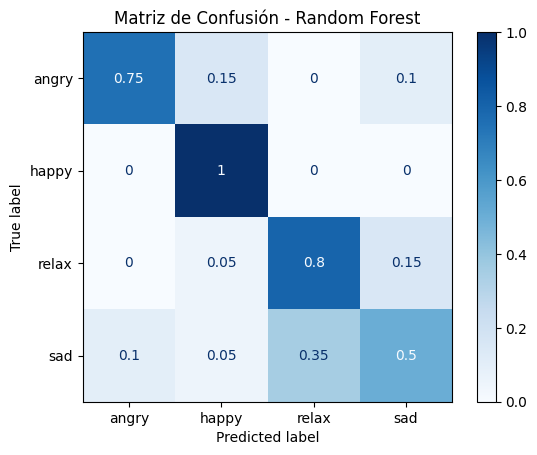

In [47]:
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None], 
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestClassifier(random_state=42, n_jobs=-1)

grid_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)
grid_rf.fit(X_train_scaled, y_train)


print(f" Mejores parámetros RF: {grid_rf.best_params_}")
print(f" Accuracy RF (Validación): {grid_rf.best_score_:.4f}")


acc_test_rf = grid_rf.score(X_test_scaled, y_test)
print(f" Accuracy RF (Test): {acc_test_rf:.4f}")

# matriz de confusion 
y_pred_rf = grid_rf.predict(X_test_scaled)
print("\nReporte de Clasificación (Random Forest):")
print(classification_report(y_test, y_pred_rf))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf, cmap='Blues', normalize='true')
plt.title('Matriz de Confusión - Random Forest')
plt.show()

Podemos ver que el modelo óptimo se consigue con una profundidad de 10 y un n_stimators de 100, llegando a una Accuracy de validación de 0.82, idéntico al que se ha obtenido anteriormente con la Regresión Logística. Esto refuerza la idea obtenida en el apartado b de que hay un límite al que ya hemos llegado.
En el conjunto de prueba, se supera al modelo RBF (que se quedó en un 72.5%) y mejora ligeramente el rendimiento de la SVM Lineal, que había alcanzado un 75%.
Esto indica que el modelo de árboles es más robusto y generaliza mejor que las SVM en este escenario.

Si observamos la matriz de confusión, el modelo detecta la felicidad a la perfección, sigue sufriendo en las emociones de baja energía (solo clasifica bien el 50% de las canciones tristes, confundiendo un 35% de ellas como relajadas), y mantiene un buen acierto (75%), pero cuando falla tiende a confundirse con Happy o Sad.

Seguimos con el apartado, ahora se realiza un estudio de interpretabilidad del modelo Random Forest para compararlo con el modelo lineal de referencia (Regresión Logística). El proceso consta de tres pasos principales. 

- Primero se hace el cálculo de de Permutation Importance utilizando la técnica Permutation Importance sobre el conjunto de test para el modelo Random Forest, se evalúa la relevancia de cada característica midiendo cuánto disminuye la accuracy del modelo al aleatorizar los valores de esa variable.
- Después, se recuperan los coeficientes del modelo de Regresión Logística (grid_lr) y se calcula la magnitud promedio de los valores absolutos de los coeficientes para establecer una medida de importancia comparable.
- Por último, se seleccionan las 10 variables más influyentes para el Random Forest y se generan dos gráficos, uno que muestra la importancia del random forest y otro con la importancia lineal para comparar.

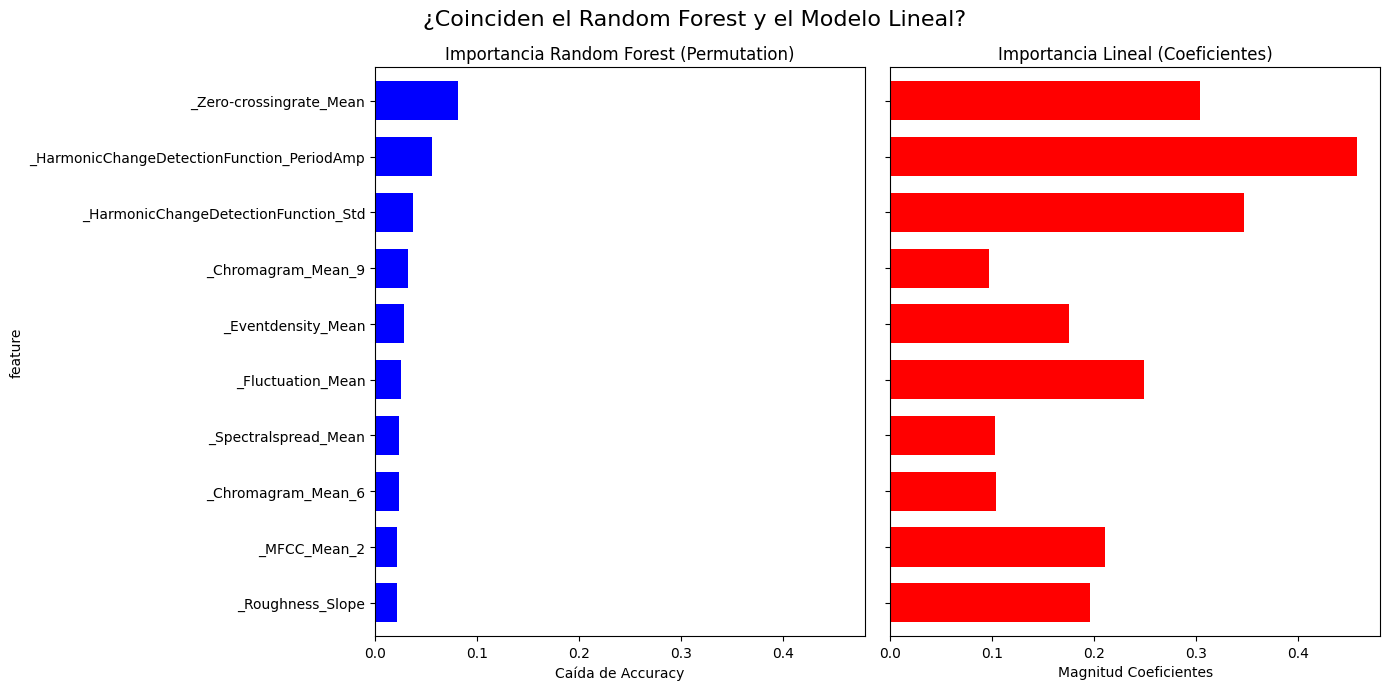

Top 5 Variables para Random Forest:
                                       feature  importance_rf
19                     _Zero-crossingrate_Mean        0.08125
48  _HarmonicChangeDetectionFunction_PeriodAmp        0.05625
45        _HarmonicChangeDetectionFunction_Std        0.03750
40                          _Chromagram_Mean_9        0.03250
23                          _Eventdensity_Mean        0.02875


In [56]:
perm_importance_rf = permutation_importance(grid_rf.best_estimator_, X_test_scaled, y_test,
                                            n_repeats=10, random_state=42, n_jobs=-1)

df_rf = pd.DataFrame({
    'feature': feature_names,
    'importance_rf': perm_importance_rf.importances_mean
}).sort_values(by='importance_rf', ascending=False)

coefs_lr = np.mean(np.abs(grid_lr.best_estimator_.coef_), axis=0)
df_lr = pd.DataFrame({
    'feature': feature_names,
    'importance_lr': coefs_lr
})

top_features_rf = df_rf.head(10)['feature'].values
df_comparacion_rf = df_rf[df_rf['feature'].isin(top_features_rf)].merge(df_lr, on='feature')
df_comparacion_rf = df_comparacion_rf.sort_values(by='importance_rf', ascending=False)


df_plot_rf = df_comparacion_rf.set_index('feature').sort_values(by='importance_rf', ascending=True)

axes = df_plot_rf[['importance_rf', 'importance_lr']].plot.barh(
    subplots=True, 
    layout=(1, 2), 
    figsize=(14, 7), 
    color=['blue', 'red'],
    legend=False, 
    sharey=True, 
    width=0.7
)

axes[0][0].set_title('Importancia Random Forest (Permutation)')
axes[0][0].set_xlabel('Caída de Accuracy')

axes[0][1].set_title('Importancia Lineal (Coeficientes)')
axes[0][1].set_xlabel('Magnitud Coeficientes')


plt.suptitle('¿Coinciden el Random Forest y el Modelo Lineal?', fontsize=16)
plt.tight_layout()
plt.show()

print("Top 5 Variables para Random Forest:")
print(df_rf.head(5))

**¿Hay cierto acuerdo entre los modelos respecto a cuáles son los atributos más importantes?**
Si observamos los gráficos resultantes podemos comprobar que sí existe un acuerdo entre los modelos. Observamos que la segunda variable más importante para el Random Forest, _HarmonicChangeDetectionFunction_PeriodAmp, coincide con la más importante para el modelo lineal, además la variable número 1 para el Random Forest, _Zero-crossingrate_Mean, también tiene una importancia moderada-alta en el modelo lineal.

Podemos concluir que, a diferencia del SVM RBF, que tuvo en cuenta variables ruidosas provocando overfitting, el Random Forest ha construido su decisión sobre las mismas características que el modelo lineal , pero añadiendo algunas variables secundarias en segundo plano. Por tanto, se podría decir que hay acuerdo en los fundamentos, pero random forest expande la capacidad predictiva capturando algunos matices que la linealidad omitia.

# Apartado E

Para este último apartado, se va a entrenar un StackedClassifer usando la SVM RBF y el random forest combinado alternativamente con la regresión logística y la SVM linear usando sus mejores hiperparámetros. Además, se calculará su permutation importance sobre el test para determinar qué atributos son más importantes en la mejor combinación.

Primero empezamos implementando la estrategia de Stacking Classifier combinando las predicciones de los modelos base no lineales entrenados en apartados anteriores. Después se selecciona la combinación con mayor exactitud (accuracy) en el conjunto de test para seguir con el análisis de atributos.

In [58]:
base_estimators = [
    ('rbf', SVC(**grid_rbf.best_params_, probability=True, random_state=42)),
    ('rf', RandomForestClassifier(**grid_rf.best_params_, random_state=42))
]

stack_lr = StackingClassifier(
    estimators=base_estimators,
    final_estimator=grid_lr.best_estimator_, 
    cv=5, n_jobs=-1
)

stack_svm = StackingClassifier(
    estimators=base_estimators,
    final_estimator=LinearSVC(C= 0.20691, dual=False, random_state=42), 
    cv=5, n_jobs=-1
)

stack_lr.fit(X_train_scaled, y_train)
acc_stack_lr = stack_lr.score(X_test_scaled, y_test)

stack_svm.fit(X_train_scaled, y_train)
acc_stack_svm = stack_svm.score(X_test_scaled, y_test)

# Resultados
print(f"Accuracy Stacking (RegLog): {acc_stack_lr:.4f}")
print(f" Accuracy Stacking (LinearSVM): {acc_stack_svm:.4f}")


if acc_stack_lr >= acc_stack_svm:
    best_stack_model = stack_lr
    best_stack_name = "Stacking (RegLog)"
    print(f"El mejor combinado es: {best_stack_name}")
else:
    best_stack_model = stack_svm
    best_stack_name = "Stacking (LinearSVM)"
    print(f"El mejor combinado es: {best_stack_name}")

Accuracy Stacking (RegLog): 0.7500
 Accuracy Stacking (LinearSVM): 0.7625
El mejor combinado es: Stacking (LinearSVM)


Entre las dos estrategias probadas, el Stacking con SVM Lineal como juez ha resultado superior (0.7625) frente al Stacking con Regresión Logística (0.7500). Esto es coincide con los apartados anteriores, donde los clasificadores de margen (SVM) tendían a generalizar ligeramente mejor que los probabilísticos en este dataset.

El dato más revelador es que el mejor Stacking obtiene un 76.25% de Accuracy, que es exactamente el mismo resultado que obtuvo el Random Forest por sí solo en el apartado anterior.
La inclusión del modelo SVM RBF en la mezcla no ha aportado valor añadido. Dado que el RBF tenía un rendimiento inferior (72.5%) y aprendía ruido, probablemente ha aprendido a ignorar sus predicciones y a fiarse casi exclusivamente del Random Forest.
No se ha podido superar el límite de los otros modelos. Esto confirma que la limitación reside en la capacidad descriptiva de los atributos y no en la potencia del algoritmo.

Para acabar el apartado se va a calcular la permutation importance del modelo ganador (LinearSVM), y se va a implementar un gráfico comparativo para ver si coinciden los atributos importantes entre Stacking y Lineal.

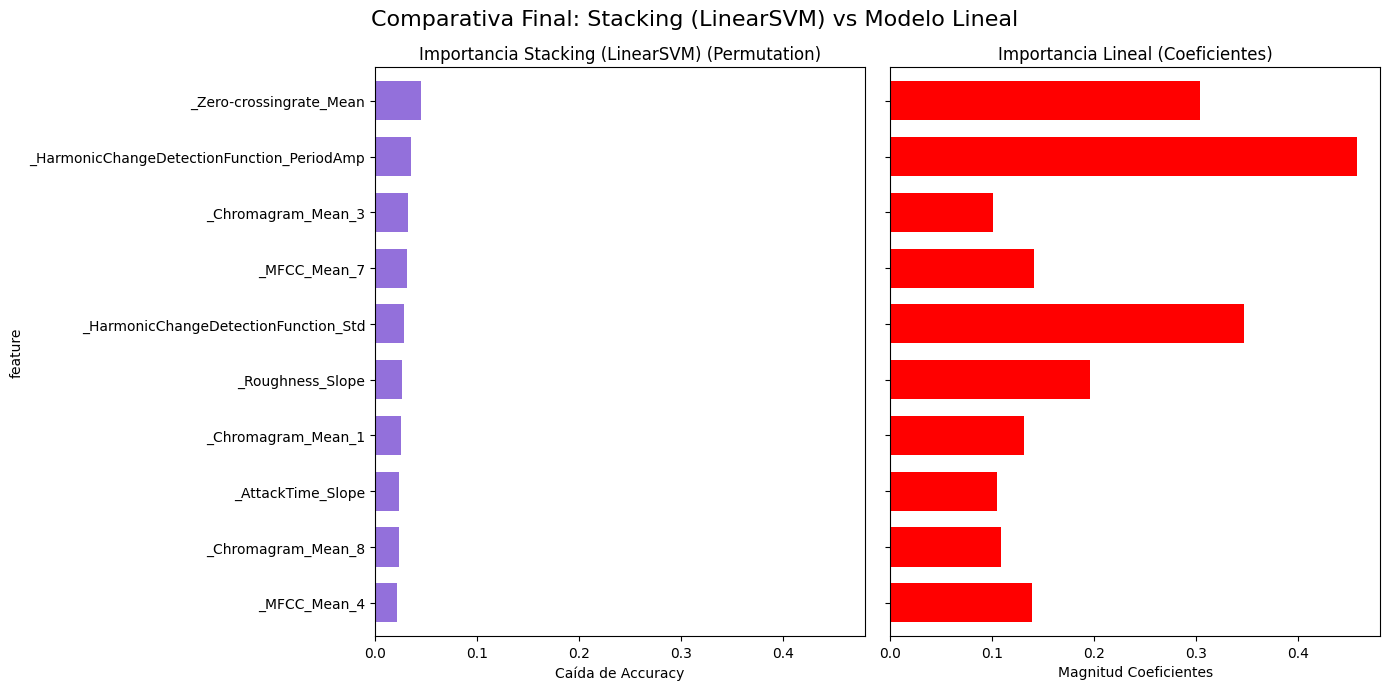


Top 5 Variables para el Stacking:
                                       feature  importance_stack
19                     _Zero-crossingrate_Mean           0.04500
48  _HarmonicChangeDetectionFunction_PeriodAmp           0.03500
34                          _Chromagram_Mean_3           0.03250
10                                _MFCC_Mean_7           0.03125
45        _HarmonicChangeDetectionFunction_Std           0.02875


In [59]:
perm_importance_stack = permutation_importance(best_stack_model, X_test_scaled, y_test,
                                               n_repeats=10, random_state=42, n_jobs=-1)


df_stack = pd.DataFrame({
    'feature': feature_names,
    'importance_stack': perm_importance_stack.importances_mean
}).sort_values(by='importance_stack', ascending=False)


coefs_lr = np.mean(np.abs(grid_lr.best_estimator_.coef_), axis=0)
df_lr = pd.DataFrame({
    'feature': feature_names,
    'importance_lr': coefs_lr
})

top_features_stack = df_stack.head(10)['feature'].values
df_comparacion_stack = df_stack[df_stack['feature'].isin(top_features_stack)].merge(df_lr, on='feature')

df_plot_stack = df_comparacion_stack.set_index('feature').sort_values(by='importance_stack', ascending=True)

axes = df_plot_stack[['importance_stack', 'importance_lr']].plot.barh(
    subplots=True, 
    layout=(1, 2), 
    figsize=(14, 7), 
    color=['mediumpurple', 'red'], 
    legend=False, 
    sharey=True, 
    width=0.7
)

axes[0][0].set_title(f'Importancia {best_stack_name} (Permutation)')
axes[0][0].set_xlabel('Caída de Accuracy')

axes[0][1].set_title('Importancia Lineal (Coeficientes)')
axes[0][1].set_xlabel('Magnitud Coeficientes')

plt.suptitle(f'Comparativa Final: {best_stack_name} vs Modelo Lineal', fontsize=16)
plt.tight_layout()
plt.show()

print("\nTop 5 Variables para el Stacking:")
print(df_stack.head(5))

Si observamos los gráficos obtenidos las dos variables más importantes para el Stacking son _Zero-crossingrate_Mean y _HarmonicChangeDetectionFunction_PeriodAmp, lo que coincide plenamente con el Random Forest y los Modelos Lineales. El modelo ha aprendido que estas son las variables más fiables y basa su decisión principal en ellas.
En tercera posición aparece _Chromagram_Mean_3, antes hemos visto que esta variable causaba overfitting en el modelo RBF del apartado C. El modelo lineal es de las que menos importancia le da, pero Stacking la mantiene con importancia alta. 
A diferencia del RBF que fallaba, el Stacking ha logrado domar esta variable. La utiliza para aportar matices, pero sin dejar que domine la decisión final, evitando así que el rendimiento caiga al 72% como pasaba antes.

Así pues, podemos concluir que los métodos Random Forest y Stacking son los ganadores definitivos, ya que logran filtrar ese ruido y explotar las no-linealidades útiles, ofreciendo el equilibrio óptimo entre sesgo y varianza.